In [277]:
#Importing necessary libraries
import numpy as np
import random
import string # to process standard python strings

import warnings
warnings.filterwarnings("ignore")

# first-time use only
# !pip install nltk
# Natural Language Tool Kit
import nltk 
nltk.download('punkt')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [278]:
#all packages 
import nltk 
import string 
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from bs4 import BeautifulSoup
nltk.download('stopwords')
import string #has the list of all punctuations
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PYTHONFABHOST\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [279]:
import pandas as pd
df = pd.read_csv("st.csv",encoding='latin-1')

In [280]:
df2 = df #copy

In [281]:
stop_w = stopwords.words('english')

In [282]:
def clean(column,df,stopwords=False):
  #remove stop words
  df[column] = df[column].apply(str)
  df[column] = df[column].str.lower().str.split()
  if stopwords:
        df[column]=df[column].apply(lambda x: [item for item in x if item not in stop_w])
  #remove punctuation
  df[column]=df[column].apply(lambda x: [item for item in x if item not in string.punctuation])
  df[column]=df[column].apply(lambda x: " ".join(x))

In [283]:
# from nltk.stem.wordnet import WordNetLemmatizer
# wordnet_lemmatizer = WordNetLemmatizer()
# df2['answerText']= df2.answerText.apply(data_preparation)

In [284]:
clean('questionText',df2) #kept stopwords

In [285]:
df2=df2.fillna(0)

In [286]:
questions = df2["questionText"].to_list()

In [287]:
# res='\n'.join(questions)
# res

In [288]:
# res.lower()

In [289]:
# clean('answerText',df2,stopwords=True)
answers = df2["answerText"].to_list()
sent_tokens =questions
ans_sent_tokens=answers

In [290]:
# answers='\n'.join(answers)
# questions='\n'.join(questions)
# answers

In [291]:
import re
# answers=re.sub("[^a-zA-Z]", " ",str(answers))
# questions=re.sub("[^a-zA-Z]", " ",str(questions))
ques=[]
ans=[]
for i in questions:
    ques.append(i)
for j in answers:
    ans.append(j)

In [292]:
# ans_sent_tokens = nltk.sent_tokenize(answers)
# sent_tokens = nltk.sent_tokenize(questions)# converts to list of faq sentences 
# # word_tokens = nltk.word_tokenize(res)

In [293]:
# print(ans_sent_tokens)

In [294]:
print("Total number of answers ",len(ans))
print("Total number of FAQs ",len(ques))
sent_tokens =ques
ans_sent_tokens=ans

Total number of answers  833
Total number of FAQs  833


In [295]:
print("FAQs in faq.txt file ")
ques

FAQs in faq.txt file 


["i'm a teenager. i get random spurts of anger, like complete, pure rage. i figured it was hormones, but others notice it too. i get self-destructive. i used to cut but stopped. now when i get mad, i bite my arms and fingers, pull my hair, scratch my face, or punch my thighs. basically, i do things i can hide instead of breaking anything in my room and having to explain it to my mom. i don't live in a bad household. i have a great family, a great relationship with my boyfriend, and a good education. i have no idea what this is and i don't know how to control it. it's over any little thing. this happens maybe two to three times on a good week, and it's always over stupid, petty things.",
 "i'm a teenager. i get random spurts of anger, like complete, pure rage. i figured it was hormones, but others notice it too. i get self-destructive. i used to cut but stopped. now when i get mad, i bite my arms and fingers, pull my hair, scratch my face, or punch my thighs. basically, i do things i ca

In [296]:
print("Answers in ans.txt file ")
ans

Answers in ans.txt file 


[' In general, when a small thing bothers us (and this happens to all of us), it\'s because the small thing triggers an emotion in us that we have felt "too much" or "too intensely" in the past, and we don\'t know how to manage that emotion effectively...we just want to avoid it as quickly as possible. Cognitive Behavioural Therapy with a qualified therapist can help you to understand what is being triggered in you and learn how to manage emotions productively. You say that your behaviours are self destructive, and I agree. It sounds like you have developed a habit of channelling your distress towards self-harm, and this is a separate and potentially more serious problem. This is a choice you make that points to shame being an issue for you. Again, a good therapist can help you learn what\'s behind your shame and self-harm. Your feelings are normal, and you can learn more healthy ways to deal with them with qualified help.',
 ' In general, when a small thing bothers us (and this happen

In [297]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]


#Remove punctuctions
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    text = text.lower()
    clean_text = text.translate(remove_punct_dict)
    words = nltk.word_tokenize(clean_text)
    return LemTokens(words)


In [300]:
#Greeting messages
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

#function to generate random greetings
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [302]:
from sklearn.metrics.pairwise import cosine_similarity
# every sentence --> vector
# similarity between vectors :: angle between vectors :: cosine :: 
# why cosine :: cosine(90) : 0 , cosine(0) = 1 :: cosine(180) = -1

In [303]:
length=len(sent_tokens)
def response(user_response,sent_tokens):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
#     print(len(sent_tokens))
#     print(idx)
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
#     print(req_tfidf)
    if(req_tfidf>=1):
        robo_response = robo_response+sent_tokens[idx]
        if idx<length:
            
            req_tfidf=1
            if ans_sent_tokens[idx]:
                print(ans_sent_tokens[idx])
                return ans_sent_tokens[idx],req_tfidf
            else:
                return 0,req_tfidf
        else:
            robo_response="I am sorry! I don't understand you"
            req_tfidf=0
            return robo_response,req_tfidf        
        
    else:
        robo_response="I am sorry! I don't understand you"
        req_tfidf=0
        return robo_response,req_tfidf
        
        
        

In [304]:
flag=True

true_prediction=0
false_prediction=0
accuracy=0
for i in ques[0:500]:
    user_response = i
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("GOD: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("GOD: "+greeting(user_response))
            else:
                print("GOD: ",end="")
                res,accuracy=response(user_response,ques)
                
                sent_tokens=[]
                
                if res == None:
                    false_prediction=false_prediction+1
                else:
                    true_prediction=true_prediction+1
                    if accuracy ==1:
                        accuracy=accuracy+1
                        
    else:
        flag=False
        print("GOD: Bye! take care..")
        
print("true_prediction",true_prediction)
print("false_prediction",false_prediction)

GOD:  In general, when a small thing bothers us (and this happens to all of us), it's because the small thing triggers an emotion in us that we have felt "too much" or "too intensely" in the past, and we don't know how to manage that emotion effectively...we just want to avoid it as quickly as possible. Cognitive Behavioural Therapy with a qualified therapist can help you to understand what is being triggered in you and learn how to manage emotions productively. You say that your behaviours are self destructive, and I agree. It sounds like you have developed a habit of channelling your distress towards self-harm, and this is a separate and potentially more serious problem. This is a choice you make that points to shame being an issue for you. Again, a good therapist can help you learn what's behind your shame and self-harm. Your feelings are normal, and you can learn more healthy ways to deal with them with qualified help.
GOD:  In general, when a small thing bothers us (and this happe

GOD: First of all, exercise is always beneficial for your physical and emotional health. That's great that you have added this in your routine. Have you also considered altering your diet? Certain foods are linked with poor sleep. For example, alcohol, caffeine, nicotine and high fat content foods do not bode well with quality sleep, especially right before bed time.  On the other hand, warm milk and foods high in carbohydrates have actually shown to positively impact sleep.Additionally, at bed time it's important to keep your room dim, cool and without distractions (i.e. TV, IPad, Phone). Stick to a sleep routine and avoid any activities close to bed time that demand a lot of attention and energy.As far as your nightmares, there could be many causes contributing to them. Certain foods (many of the ones mentioned) or medications could be the culprit. Doing a bit of research into the ones you are consuming may help you eliminate the offender. You may also benefit from talk therapy with 

GOD: A lot of times the thoughts we have about ourselves are messages we have received from other people and later internalized them. So in that sense, these thoughts are yours and belong to you, but you have received these messages from somebody else. Even though we all receive messages like this at times, it pays to be careful not to ignore other messages we are receiving, such as a loved one appreciating your help or attention, a friend responding to encouragement, or a colleague showing interest in you. I hope this helps.
GOD: A lot of times the thoughts we have about ourselves are messages we have received from other people and later internalized them. So in that sense, these thoughts are yours and belong to you, but you have received these messages from somebody else. Even though we all receive messages like this at times, it pays to be careful not to ignore other messages we are receiving, such as a loved one appreciating your help or attention, a friend responding to encouragem

GOD: That's a very difficult situation that you are in. But you are not alone. I have several school-aged clients who find little to no assistance from their teachers at their schools regarding bullying.There are a few options that are available to you to help deal with being bullied at school. One option that I would suggest is for you to talk to your support network. Friends and family can sometimes be good sources of support. Another option would be to speak with us about your counselor, if you have one. And third, there are some excellent online sources of support regarding the bullying at school (www.stopbullying.org).
GOD: That's a very difficult situation that you are in. But you are not alone. I have several school-aged clients who find little to no assistance from their teachers at their schools regarding bullying.There are a few options that are available to you to help deal with being bullied at school. One option that I would suggest is for you to talk to your support netwo

GOD: Conflict is a tricky beast and shows up in every one of our relationships. What I'm reading is that you find yourself in a loop of  seeking validation of your thoughts and feelings from your friends rather than validating yourself. Am I right? If you aren't validating yourself, no one else will be able to either.  Try finding a small nugget of truth in the feedback your friends give you, this will help to lower your defenses and help your friends hear what you are really sharing.  And then if you are still feeling vulnerable, share that too...
GOD: It sounds like your confused as to why your friends would be calling you a hypocrite when they act in the same manner, correct? Communication is key to any relationship. I would recommend speaking with your friends face-to-face to address why they feel your behavior is concerning. In-person contact is the best method of sorting out differences considering texts, emails or any written response can be misconstrued. Be upfront with them an

GOD: Is being friends with this person safe for you?Liars don't generally distinguish who they bring down with them or in service to themselves.Step one is to understand a true friendship, which is based on trust, is probably not possible with this person.If you'd like to offer words of advice to protect her from herself then try gently pointing out that some of her actions which you know about, may come around to harm her.There is only a small chance she will be open to hearing you.People who lie are also very fearful of trusting others, including themselves.  She may prefer to keep status quo than open her own emotional pain to understand what created the need to lie in the first place.
GOD: Is being friends with this person safe for you?Liars don't generally distinguish who they bring down with them or in service to themselves.Step one is to understand a true friendship, which is based on trust, is probably not possible with this person.If you'd like to offer words of advice to prot

GOD: Figuring out the space we need between ourselves and others is an ongoing and unsolvable task.  But it sounds like you may be feeling stuck in a pattern of pushing people away and are wanting to change that.  Pushing others away may be your way of surviving relationships and may have proven to be very helpful at one point in your life.  Or it may be serving some other purpose.  One helpful way to consider changing that is to seek out a therapist.  Psychotherapy can provide you with a relationship that is in tune to you and that can provide the reflection and supportive challenges to help determine the function the 'pushing away' is serving.  It also may be helpful for you to take time to reflect on the moments when interpersonal guardedness snuck its way into the interaction.  What were you feeling right before this?  Did it provide relief?  Reflecting on what was happening just before and right after can provide some clues as to what purpose the 'pushing away' serves.It may be he

GOD: Your happiness and healthiness is key.  I would not suggest that you hold back and keep it a secret.  You should be up-front about it, but perhaps gently bring it up on a date.  When thinking about whether or not you should stop, think about how it makes you feel.  Perhaps try to be social at more accepting affirming locations in your area.  The people who will accept you for who you are are out there.  You may not be looking in all of the places you have available to you.
GOD: While this might not be the first thing you want to discuss when you meet someone, it is important for you to be yourself.  It's better to weed out 10 people who can't accept you to find that one who can.
GOD: Keep doing the crossdressing since you like it.Your problem sounds more a matter of timing and reason to tell the girl about it.Not keeping a secret is a good attitude regarding meaningful parts of your life.  Usually our relationship partner is someone whom we trust as a safe person to know all about

GOD: I wonder if you are having some of these thoughts related to something that has neither happened directly to you in your past or to someone that you care about. This can often change the way that we look at different situations. Try to look at what feelings, for you when you notice that someone is "checking her out," and perhaps when you have felt these feelings before.If you trust your girl enough to have an open conversation, perhaps you could ask her whether she is willing to talk about something that is important to you. Then you could talk about feelings that you're having.
GOD: Trust is at the top of what makes a healthy relationship.  It sounds like you may benefit from personal counseling to explore where this jealousy comes from and what keeps you from having complete trust in your boyfriend.  This is not stupid, this is your mind telling you that there is something that needs to be worked through.  Sometimes we need to talk to someone like a counselor who is disconnected

GOD: If you connect with your therapist and can say whatever you want to say and not be judged. If you feel like things, situations, your outlook are shifting for you.
GOD: If you connect with your therapist and can say whatever you want to say and not be judged. If you feel like things, situations, your outlook are shifting for you.
GOD: GOD: I am so sorry about your loss.  Losing someone you love is always difficult, however, losing a mother is a significant loss in a daughters life.  What makes this loss complicated is that it appears you have also had a loss in your relationship with your sister.  It is difficult to know what happened with your sister with the limited information you have provided, but what I suspect is that there are some unresolved issues between the two of you and that she may be projecting her pain on to you.  It is important to remember that your sister is also grieving the loss of your mother and may not be dealing with it in a very healthy way.  By her bring

GOD: GOD: Studies have proven that addiction affects the brain, there are many coping skills that addicts use to enable their addiction as well.  I would recommend that you speak with someone abut your relationship and your concerns.  Not only so you can have more clarity in the situation but we often tend to gravitate around or toward the same types of individuals.  Being more aware of your relationship will help you in the future when re-engaging in personal relationships.
GOD: Your friend needs to admit they have a problem.  If not no matter how many pills you take they will find a way to get more.  It is also a federal offense to take someone else's medication so if you did take it she could have you arrested.  In other instances it can be more dangerous to take medication away than slowly tapering off of them.  Like anything we put into our system our tolerance builds up and can effect us in different ways.  I would listen to her and discuss why she feels that she needs to be on t

GOD: Both you and your mom are in a tough spot.  She has returned to parenting after she thought she had raised her kids, and while I am sure you'd like to be supportive, you recognize that listening to her complaints really does not help her and drains you.  In addition to that, it sounds like Mom's complaining has become "the" conversation she has with you, leaving other, more fulfilling conversations out of your relationship.Think about what you want instead with your mom.  More time with just her?  A chance to offer true help,not just listen to complaints? When you have some idea of what you want, tell her.  You can do this kindly and respectfully, with a concern for both her and your relationship with her.  It might go something like this..."Mom, you really have your hands full.  Sis dumped your grandbaby on you and I bet this isn't how you imagined grandparenting would look.  It's got to be hard and I am not sure how I can be helpful.  Beyond that, I really miss talking to you ab

GOD: Then one day when life between you and mom feels calm, tell your mom that you aren't able to listen to her complaints about your sister.The truth exists whether or not it is acknowledged.   Bu acknowledging what feels real and necessary in your life, you are helping your mom see what she may not like to see and what nevertheless is right in front of her.There is no good reason or good to come of hiding your own truth about not wishing to continue listening to your mom complain.
GOD: Then one day when life between you and mom feels calm, tell your mom that you aren't able to listen to her complaints about your sister.The truth exists whether or not it is acknowledged.   Bu acknowledging what feels real and necessary in your life, you are helping your mom see what she may not like to see and what nevertheless is right in front of her.There is no good reason or good to come of hiding your own truth about not wishing to continue listening to your mom complain.
GOD: This sounds very st

GOD: GOD: There is nothing wrong with going to summer school.
GOD: GOD: A relationship gets weaker, not stronger by threatening control of the other person.Start by telling your boyfriend to keep his remarks about you and the interests he is in which you two disagree, limited to these areas.Your relationship with your mother is between you and her.Regardless of how much he doesn't like her, to not respect your mother daughter relationship is unreasonable and disrespectful toward you.Threatening to take action against you by withdrawing himself from your relationship, is almost guaranteed to harm the good feelings between the two of you.Does you boyfriend dislike your mother for any reason having to do with her being a danger to you?Ask his reason since if he does this from concern for your emotional or physical safety, then this is good sentiment which is handled incorrectly, by a threat to you.What you should do is ask your boyfriend to not threaten you and to calmly talk about the to

GOD: Hello, and thank you for your question. This is certainly a tough spot. I have a few thoughts and perhaps some colleagues will add some things. You may want to spend a few minutes calling to mind any conversations that you have had with your father about transgender issues, or if you have ever heard him talk about it. That may give you a small clue about how well he may accept this news from you. For example, if he has been watching the news lately, transgender rights is something that is being talked about a lot. Has he had an opinion? This won't tell you for sure if he would be okay with learning you are transgender, but at least you would know if there is hostility toward transgender people. To tell you the truth, the best way to tell your dad is whatever way feels right to you. There is no right or wrong way, best or worst. If you want to tell him when you are by yourself with him? That's perfect. Want to have a friend with you for support? Equally perfect. Whatever thing you 

GOD: Anger is a normal emotion, and yet it is a really hard one... how much is too much? and how do you express it without damaging those around you? yes mom's get angry, sometimes too easy... but its their responsibility to manage their anger-- get their own support and put themselves in time outs when they cannot handle it well.  Since you are the kids, you shouldn't have to fix or calm down mom's anger. Maybe in a calmer time when you guys are being silly talk with her one on one? Tell her  you are feeling sad and hurt that she gets upset at you girls. Ask her if there is 1 thing you can work on this next month to help her. Ask her if she would work on 1 thing for you this month-- not yelling? taking a time out? telling you before she blows her top so you can exit the room? Also for you, check out a library book on anger so you know how to handle yours, and one on parents and anger. Number one to remember, if you don't feel safe, if she is calling you names, or hurting you, breaking

GOD: This is a common issue. You grow up gradually, and parents often forget to shift their habitual responses according to your newfound level of maturity and growing need for freedom and independance. I'm all for helping you find new ways to cope and interact with your mom. Ultimately, you only have control over yourself, so that's the place to start. You can remind yourself that Mom's behaviours don't mean that she doesn't trust you or love you; it's just that she has habitual ways of talking to you that seem stuck in the fourteen year old range. If you can see her responses as habits, rather than a reflection of how she feels about you, then you can keep yourself calm. The more calm you are, the more she will buy into it when you invite her into a different sort of relationship. Take a look at the picture from her perspective. She may feel overwhelmed with finances (are you in college?), and feel burdened by the mundane tasks in life that she doesn't know how to recruit help for. I

GOD: How someone feels when they forgive another, is at peace with themselves and their understanding of what went wrong, who was responsible for what in the situation, and clarity on their own motivation, actions, emotions including pain, regret, resentment, sadness.These steps ideally allow a new door to open in order to develop new paths in the existing relationship or accept that this will not be possible due to either person's way of handling themselves.The long answer would be that you're not yet through with this process.I commend you on being truthful with yourself about yourself.You're on the right track by expecting to feel resolved when you've reached resolution, and not before.Finding patience with the unpredictable amount of time needed to thoroughly examine all the details of the incidents you mention, sometimes is a frustration of its own.Keep up your good work of knowing your own life.It is a worthwhile endeavor!
GOD: The best way to work on a relationship is for both p

GOD: Attention is not equal to love and being valued. It may be precisely because your brothers demand so much more your mom's attention through fighting with her that she pays more attention to them. It is a common situation in families where the "squeaky wheel gets the grease" and the siblings or family members who don't demand as much attention end up feeling invisible. It sucks to feel invisible and it is important that there is attention for you and that you know how much your mom loves and values you.  This sounds like an important conversation to have with your mom and if she is not able to really understand or help you address this concern you may want to suggest doing some family therapy where a skilled therapist can help you and your family work this out.
GOD: I think it would be wise for you to call a hotline especially designed for children. It's called the Childhelp National Child Abuse Hotline. The number is 1-800-4-A-CHILD (1-800-422-4453). It is completely anonymous and

GOD: GOD: Since you've decided to be with the boy who already showed you his interest, then why not simply tell him you decided to accept his invitation to be together?Probably your first concern about hesitating to accept this boy into your life due to the way you imagine your family may react if you do, is the more complex matter to solve.Forming a relationship does bring up our values and the way these are different or similar to our own.    At the same time, we already have values which are rooted in those from the family in which we grew up.Your dilemma of wanting to be with this boy shows there is a clash between your values as an individual, including your choice of partner, and the way your family understands the values which support being part of a couple.Stay true to what you feel, whether this comes from your family or the way you currently are evolving.This will guarantee that your new relationship will be built on the values and person you truly are.
GOD: Maybe the reason 

GOD: Those words must have been extremely difficult to hear or read. It sounds like you are both having difficulty with the distance, and I can only imagine that you have both been coping with this distance as well as you can. There are a few scenarios that I think would have pretty radically different paths for your own mental health, and I would like to explore them separately. The first scenario is that she has this crush, but still chooses you and wishes to stay with you. Keeping the value of her choice in mind, and the bravery she has shown in admitting this crush, handling her gently in that vulnerable place will pay off. You may find it worthwhile to explain your feelings about it, to share how it is hurting you to know of this, and what she means to you. Explaining those feelings will help you to not act out in your with emotions to cover up by becoming angry or withdrawing. Acting in this way will help assure her of her choice in you, and sharing these emotions and feeling sup

GOD: I can only imagine how hard that must have been to hear. On one hand, most of us would say we want our partners to always be honest with us, but on the other disclosures like this can lead to feelings of worry and inadequacy if we're not careful. So let me first of all say that it is very normal for human beings, even very committed and happy partners to have moments where they notice an attraction for someone else. Quite honestly, the brain can't help it. It sees something good looking and it pays attention. And when we pay attention to something good, our brains send out neurochemicals associated with that happy thought...and we get a rush of what your girlfriend is labeling "a crush." The difficulty here is deciphering whether she was just attempting to honor her commitment to you by sharing this feeling OR if she is continuing to feed those feelings. I would encourage you to thank her for being honest if you haven't already, and ask her to further describe the nature of these 

GOD: GOD: Attraction is important but sometimes over-rated. I'm curious about your comment that you are not as attracted as you "should be" - What is your measuring stick is for what you are supposed to feel in terms of attraction in a relationship? Do you want to be sexually intimate? Do you enjoy having sex with him? Are you satisfied with your sexual relationship when you are with him? The fact that there is lust for other more attractive men does not necessarily mean anything. There will always be attractive men and more attractive men than your partner and these attractive men will be even more appealing when you are in a long-distance relationship far from the arms of your partner. Loving someone does not mean that you stop being a sexual being who no longer notices and desires attractive men. Attraction results from a number of factors beyond appearance - including the degree to which you feel emotionally open, safe, and connected and how in tune you are with each other's bodies

GOD: A key factor in a relationship is trust.I'd start by understanding more about why you feel unable to trust your bf.Does this have something to do with a bad encounter you had from previous relationships, or with a sibling or parent?Its also possible you're intuitively sensing you can't trust your bf bc he's not trustworthy.  Sometimes people sense the basic safety items in a relationship before they emerge.Also, your bf may have similarly suffered broken trust and he gives off a feeling of not welcoming your trust.Its possible you're feeling his own self-protection about being in a relationship with you.The best way to open these topics is to actually talk about them together with him.Whatever the underlying tensions are, talking about them always adds positive feeling and confidence to a relationship.
GOD: GOD: There's online forums and blogs, some of which have interactive discussion groups.Also, depending on exactly  what you mean by becoming "emotional", feeling overwhelmed by

GOD: Attention is often something that is both wanted and sometimes not wanted all the time. Maybe when you're in a relationship with someone you can discuss the amount of attention that you are both comfortable with and/or what you are both looking for as far as amount of connection.
GOD: There are different types of attraction.  You said that you've never felt this sort of feeling of your heart beating faster with your current boyfriend. Depending on how long you've been together and if you're looking at different ways of making a life together and getting to know each other on a deeper level, that's a different stage in a relationship and sometimes it feels different. Some people look at it as a difference between levels of passion and compassion, but there are many different terms to try to talk about it.Perhaps with this guy that you really love, you could talk about ways to keep things new and different in the relationship. Maybe you can leave notes for each other during the day 

GOD: It is completely understandable that you would like to find a way to make these intrusive thoughts go away, however, your feeling that you can't control having these thoughts is accurate. It's also understandable that you would feel helpless and guilty, given that you see how these thoughts are effecting your relationship, though I would encourage you to go easy on yourself and remember that you aren't choosing to have these thoughts. I'm sure that if there was a switch to turn them off, you would flip it.There is no magic technique or pill that can guarantee these thoughts will go away, however, therapy may still have a lot to offer. In working with a competent therapist, you may be able to gain insight into where these thoughts are coming from and develop new ways of relating to them so that they do not leave you feeling as helpless and guilty and can be more present with your partner. Though there is no guarantee that the thoughts will go away, this may also be a result of work

GOD: What would make you feel no one wants to be with you?
GOD: GOD: GOD: Would you have the same desire to meet this friend if she were a he? If you are concerned that their friendship is a substitute for you when you aren't present, talk to him. It sounds like you are concerned that he is building an emotional intimacy with her and spending time doing the sort of things with her that you'd otherwise be doing with him. Help him understand why this bothers you but try to also be open to allowing him to make friends. Is the issue that he hasn't introduced you? Is there another reason you don't trust their friendship?
GOD: Cheating is often a sign that something is amiss in the relationship. His fear may be full of information. While it's possible to repair relationships after a betrayal it's also challenging to do, especially so early in your relationship. I can't tell you if you should/shouldn't give this relationship a second chance but I will tell you to tune into your own intuition 

GOD: Sexual orientation is not always something that is clearly definable. Some people look at it on a continuum where being attracted to only boys is at one end, only girls is at the other, and bisexual is in the middle. Anywhere in between those points can be any amount of attraction to boys or girls.If you don't know whether you are gay or bisexual, that is okay. A lot of people don't know for quite some time. In addition to that, after people do know who they are attracted to, a lot of times they do not use the terms "gay" or "bisexual" for quite a while.It's okay not to know.Think about what sorts of expectations you have for your ideal relationship. Some examples may include trust, respect, availability for conversation or connection, etc. Whatever it is that you find important in a relationship is likely what matters most.If you are struggling with learning what it is that you would like in a relationship or any other feelings connected with what you are thinking and feeling, I 

GOD: GOD: Hi, and thanks for your question. I agree with my colleagues about researching asexuality, but I want too add a couple of things about that:Here is a website that you can start with to get some information about asexuality - http://www.asexuality.org/home/There are a whole lot of myths surrounding asexuality. One is that people who are asexual have absolutely no interest in sex, and that is not always the case. There are variations of asexuality. Some people who are asexual have an interest in sex and others don't. Also, once you read more on this topic, you may find that you don't connect with asexuality either, and that is okay. Our society usually thinks of sexual orientations as only being straight, gay, lesbian, or bisexual, but the truth is there are many variations of sexual orientations. Keep exploring. There is a good chance that there is a community of people who feel like you do. Finally, labels are important for a lot of things, but labeling ourselves can sometime

GOD: Hello, and thank you for reaching out to ask for help. Surely this is a very confusing time for you! If you have never had these
feelings and desires it could certainty shake everything you thought you knew
about yourself. 
My guess is that you becoming sick around the time that this
started is likely a coincidence, but I understand how you would make the
connection. 
I have a feeling that a few things may be going on here. It
is really hard to say since I dont know you, how old you are, etc. But, I will
share you with you some thoughts. 
Some people, when they have undesirable thoughts that really
surprise them, have a really tough time getting rid of them. Our reaction to
the thought can be very strong and our tendency to try to block it out, stuff
it, avoid it, etc. is not always successful. In fact, its usually not. 
Its like telling you not to think of pink elephants. I
would be willing to bet that you thought of a pink elephant just now. 
So, rather than fighting thoughts

GOD: Possibly yes, and definitely worth a try.First read about different types of therapy for OCD so that you find a therapist who does the type of therapy which feels best when you read about it.
GOD: GOD: Mood swings and getting frustrated when things don't work out is totally normal. Sometimes, we get tied to one thing we really want to do and it can feel pretty intense when that gets interrupted or doesn't work out. This said, you're coming to CounselChat and so I'm guessing this is something that is pretty intense for you and something that you are concerned about. If this is getting in the way of your life, it may be worthwhile to reach out to a therapist or doctor to get some help with this and see if there might be something more going on. While for most people frustration/mood swings is related to typical life and stress, if very intense it can be a sign of a number of challenges ranging from anxiety to a traumatic experience to something like Bipolar Disorder where a person's

GOD: Hearing voices can be a very upsetting experience to have. I want you to know that a lot of people will hear a voice at some point in their lives and that there are many things that cause voices. Oftentimes, significant stress can offset us to have symptoms like this. There also mental and physical health conditions that can do the same. I strongly encourage you to seek out help from both a doctor and a counselor to help you piece together exactly what is causing your voices. I Once you've got that down, you'll know what to work on. In the meantime, here are some strategies to cope with voices1. Lower your stress levels: Oftentimes stress makes voices worse. What can you do to lower your stress?2. Get enough Sleep: Like stress, sleep deprivation is an awful trigger for hearing voices3. Listen to Music; Music can help you focus on another sound4. Wear headphone or Earplugs5. Use Your Own Voice; If the voices are saying harsh things to you, it can be tempting to talk back and that's

GOD: GOD: GOD: The good news is your awareness that being violent to animals feels out of character for you.   I'm glad you have awareness and I'm glad you are not at ease with killing frogs.Fairly likely that you were acting out aggressively toward the frog, feelings of being on the receiving side of similar type of violence.Basically, you did unto the frog what someone has or to you, feels like, has been done to you.Use your surprising finding of how strong your anger and most likely inward pain.   Reflect on your closest relationships and how these people treat you.   It is possible you feel more hurt by someone who is close to you than you ever realized.Stabbing innocent frogs is wrong.  It is understandable as a way to show you how much inner pain you probably have.It is also wrong that someone close to you hurt you.The direction to go is to recognize your pain and then decide how to go about changing what is possible on your side of that or those relationship(s).
GOD: A lot of di

GOD: GOD: The fact that you're concerned says a lot. If I was your therapist I'd ask you questions about your worries and how this is causing a problem in your life. You're causing perhaps permanent changes (damage?) to your body, and it's likely you're trying to express something...pain maybe? A therapist can help you to explore what's going on for you and how to get your needs for self-expression met in a more healthy way. Good luck!
GOD: It sounds like you are experiencing a great deal of distress and you're wondering if it may meet a diagnosis of Bipolar disorder. There are a few different types of Bipolar diagnoses in the DSM (diagnositc and statistical manual) and the best way to find out if your experiences would meet that diagnosis would be to meet with a mental health professional. You can also look up the diagnosis online and see if what you are going through meets the criteria.One question that I would have for you is, what would it mean for you to find out that you meet the

GOD: Maybe it is a way to secretly satisfy your own wish to be or to live life gay.
GOD: Sometimes the reason for being attracted to older men is because of growing up with a father who was distant.If you grew up having enough interaction with your dad to know you'd have liked more and didn't receive this, then maybe your longings of childhood are still active within you.It is ok to like older men.Just be sure you're not idealizing them, or anyone else.Because regardless of age, a relationship is based on who the two people really are, not how we'd like imagining them.
GOD:  What you're experiencing is normal. We're sexual beings. We have a built-in desire to connect sexually with others, because it feels good, to keep procreation going, and mostly to "connect" with other people, because connecting with others makes us feel fulfilled and valuable. Sexual desire is a healthy part of you. Maybe your body is telling you it wants to dive into that water and taste it instead of just staring

GOD: GOD: I'm sorry that you are having a difficult time.I wonder about how your friendships are in person. If you get along well with people and have effective conversations with them face-to-face, there could be some kind of technology-related problem.Have you tried gently talking to people about how you send a message and they didn't answer? If you can phrase it in such a way that they recognize that you are asking for information and not blaming them for not answering you, that could be effective.I'd also encourage you to consider how much this is bothering you. If it is causing a significant amount of anxiety (say, more than 5/10 if 10 is really anxious), I would suggest talking with a local therapist.In the meantime, consider talking about this with someone you trust to whom you can get more details to get a more specific answer.
GOD: GOD: I'm sorry that you are having a difficult time.I wonder about how your friendships are in person. If you get along well with people and have e

GOD: GOD: Conflict is a tricky beast and shows up in every one of our relationships. What I'm reading is that you find yourself in a loop of  seeking validation of your thoughts and feelings from your friends rather than validating yourself. Am I right? If you aren't validating yourself, no one else will be able to either.  Try finding a small nugget of truth in the feedback your friends give you, this will help to lower your defenses and help your friends hear what you are really sharing.  And then if you are still feeling vulnerable, share that too...
GOD: It sounds like your confused as to why your friends would be calling you a hypocrite when they act in the same manner, correct? Communication is key to any relationship. I would recommend speaking with your friends face-to-face to address why they feel your behavior is concerning. In-person contact is the best method of sorting out differences considering texts, emails or any written response can be misconstrued. Be upfront with th

GOD: Practise positive self-talk. Understandably, we are our own biggest critic.Reduce weight to maintain your health but not to prove others.Take yourself outside.Be more mindful of how you treat your body.
GOD: Loss of focus can happen for many reasons. They include mental and physical health problems, stress, the use of some medications, and a lack of sleep or and inadequate diet.The best way to remove stress is to fill yourself with positivity. Enjoy everything that you do. 
GOD: Acknowledge your pain. First, know that your grief is normal.Read about others in your situation.Examine what went wrong in the friendship.Try a new friend group.
GOD: Getting into a fight with a friend is an awful feeling. You might feel frustrated and mad at your friend, or you might just want to make up. Even though it can feel like you'll never get back to normal, you may be able to mend the friendship by reaching out to your friend and listening to what they have to say.
GOD: List the lessons you've l

GOD: It sounds like you are noticing that you are drawn towards sad and negative content and it's hard to understand why. This may sound counter-intuitive, but sometimes we do things that on the surface may look problematic (or even cause us some real problems) because it serves us in some unseen way. A simple example would be somebody who is addicted to a substance; their addiction may be causing serious problems in their life, and they may even know it, but the addiction serves them by helping them to avoid painful feelings that they anticipate having if they quit using. Now I am not saying that what you describe is an addiction, it is just a really illustrative example of the unseen benefit.One thing I would be wondering about is what is the unseen benefit of seeking out sad and negative content? I'd also be wondering what your relationship is to other feelings. These are things you may benefit from exploring with a competent therapist.
GOD: This is actually pretty common. When wint

GOD: For some people, having a sense of belonging takes some time.You mentioned that you have an education and some basic daily needs. I wonder if you may be able to look at your relationship with yourself and what makes you feel happy, safe, and having a sense of accomplishment. If you have those feelings, I wonder how you define trust and who you trust.You say you have a good time with people who are "supposed to be close," so I wonder what keeps them from feeling close. I have also wondering if you have been emotionally hurt in the past, and if so, you may have some protective defenses that you use (maybe on purpose, maybe not) to protect yourself from being hurt again. Remember that this idea comes in degrees where you can be more perfect in certain situations and a little less in others. Being emotionally protected is on a spectrum or continuum, where you can make an infinite amount of adjustments or changes with different people and situations.I also wonder what it is that you wa

GOD: One way to know yourself a little better and why the dynamics you describe take place, is to understand the particular dynamics of your life context.Look at your major areas of where you spend your time, whether you are happy with the people with whom you socialize, how you feel toward family members and how they seem to feel toward you.If you examine your relationships and life this way then you may start to notice areas where you have some control or at least a say in how your life is going.If you are socializing among people whom you don't like, have a job you don't like and your family mistreats you and you mistreats them, for example, then anxiety and depression are an understandable natural result.If you make improvements in your life and relationships, even tiny improvements and even the effort and intention to improve, you may find your anxiety and depression dissipating.People usually feel their worst when they feel lack of control in their life.Look for ways you can rega

GOD: Hello. So, someone made you happy but is no longer around? I am sure that feels devastating. As a counselor I usually have to ponder this kind of thought because it lends itself to suggesting that happiness comes from the external, rather than the internal side of a person's life. Happiness is formed within ourselves. All the external trappings of happiness are usually quite fleeting, and temporary. Even relationships fo not last forever. If we get to a place where we are reliant and dependent on those around us to create happiness in our lives, then we lose the opportunities for us to do it ourselves. We are entirely capable of finding ways to be happy. Sometimes this entails working out issues that are holding us back from reaching a place of peace, or resolution to a specific problem.What I would offer to you, is to find ways in which you can develop happiness for yourself. What do you like about your life as it is right now? What can you do to create change in your life to inc

GOD: Everyone has some level of anxiety - it's what helps us respond to stressors in our lives and clues us into the fact that we need to respond to something going on. However, if you're feeling overwhelmed by racing thoughts, feeling like you spend a lot of energy worrying about something specific or even pretty much anything at all, and you're starting to find that it's getting in your way when it comes to living your life the way you want, then I'd suggest seeing a counselor or therapist for an assessment for anxiety. Your other concerns, though, seem pretty "normal" for someone who is in a relationship with a partner who has children. As a married stepmother, I've been there, and as a therapist, I can tell you that the boundaries and communication skills you have in your relationships need to be healthy for you to feel healthy. Finding some support from a group of others whose partners have children might be really helpful - being able to hear from others that you aren't alone in 

In [305]:
test_name=['true_prediction','false_prediction']
test_result=[true_prediction,false_prediction]
accuracy

2

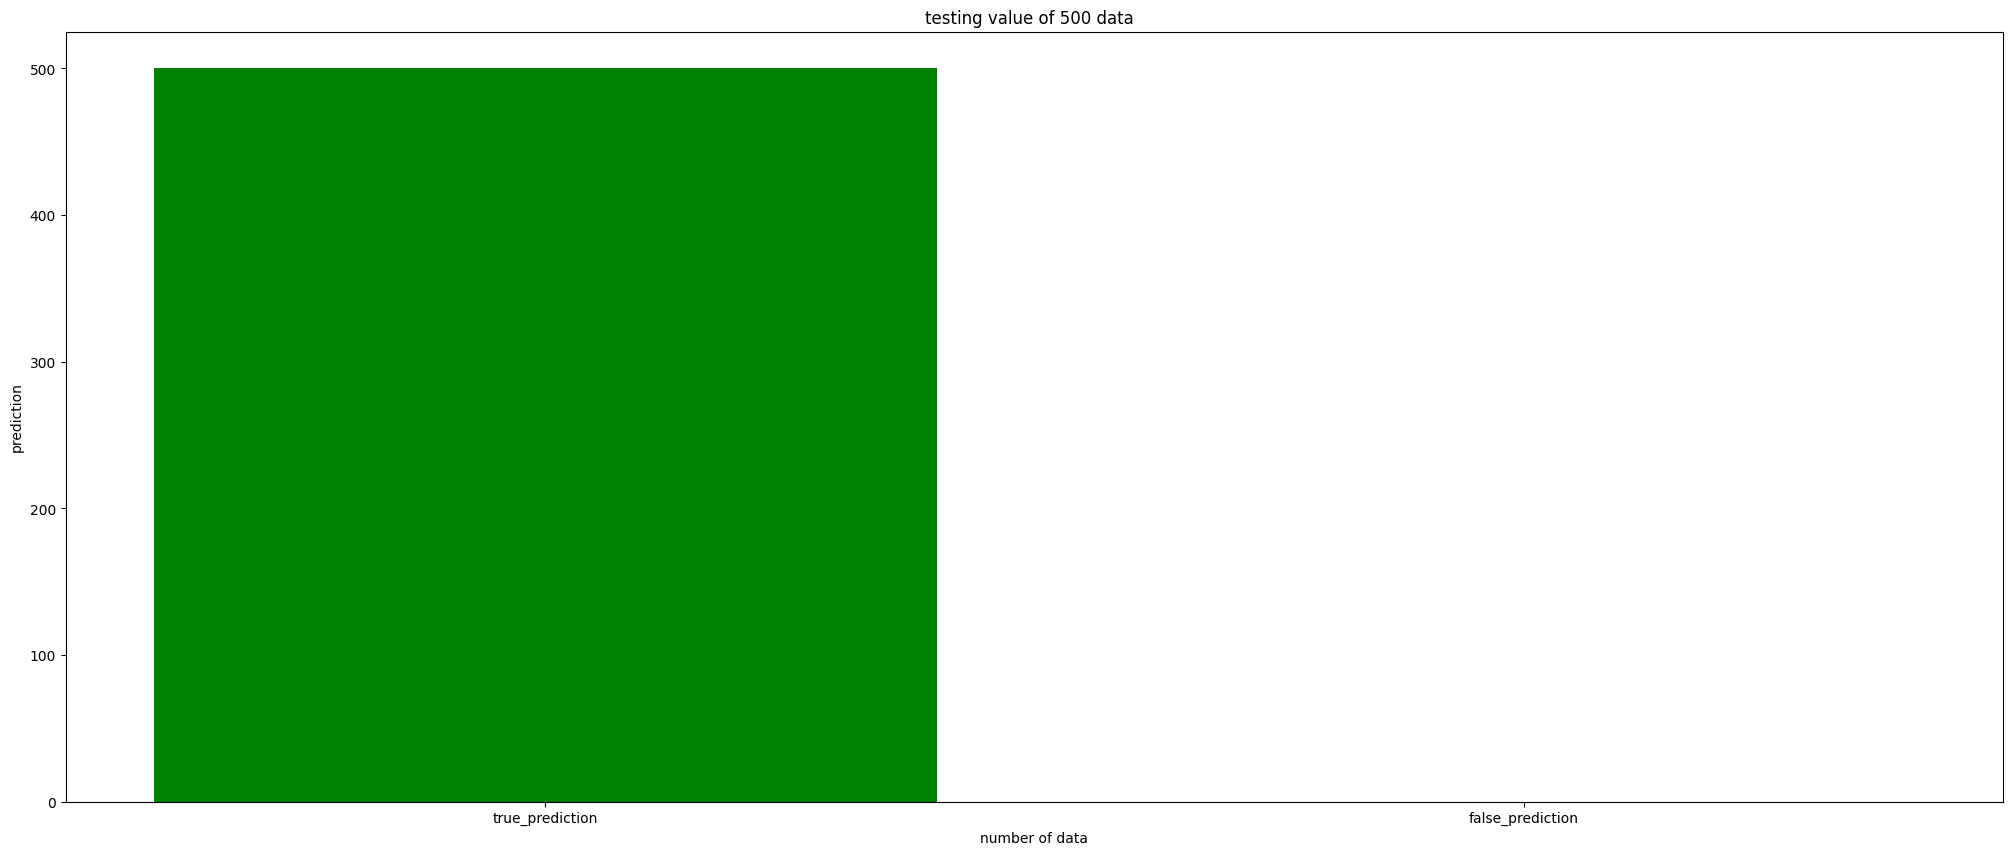

In [306]:
import matplotlib.pyplot as plt
import pandas as pd
  
  
# Initialize the lists for X and Y

  

# print(df[20])
X = list(test_name)
Y = list(test_result)
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(25)  
# Plot the data using bar() method
plt.bar(X[0:25], Y[0:25], color='g')
plt.title("testing value of 500 data  ")
plt.xlabel("number of data")
plt.ylabel("prediction")

# Show the plot
plt.show()
fig.savefig('trending_topic.png', dpi='figure', format=None)

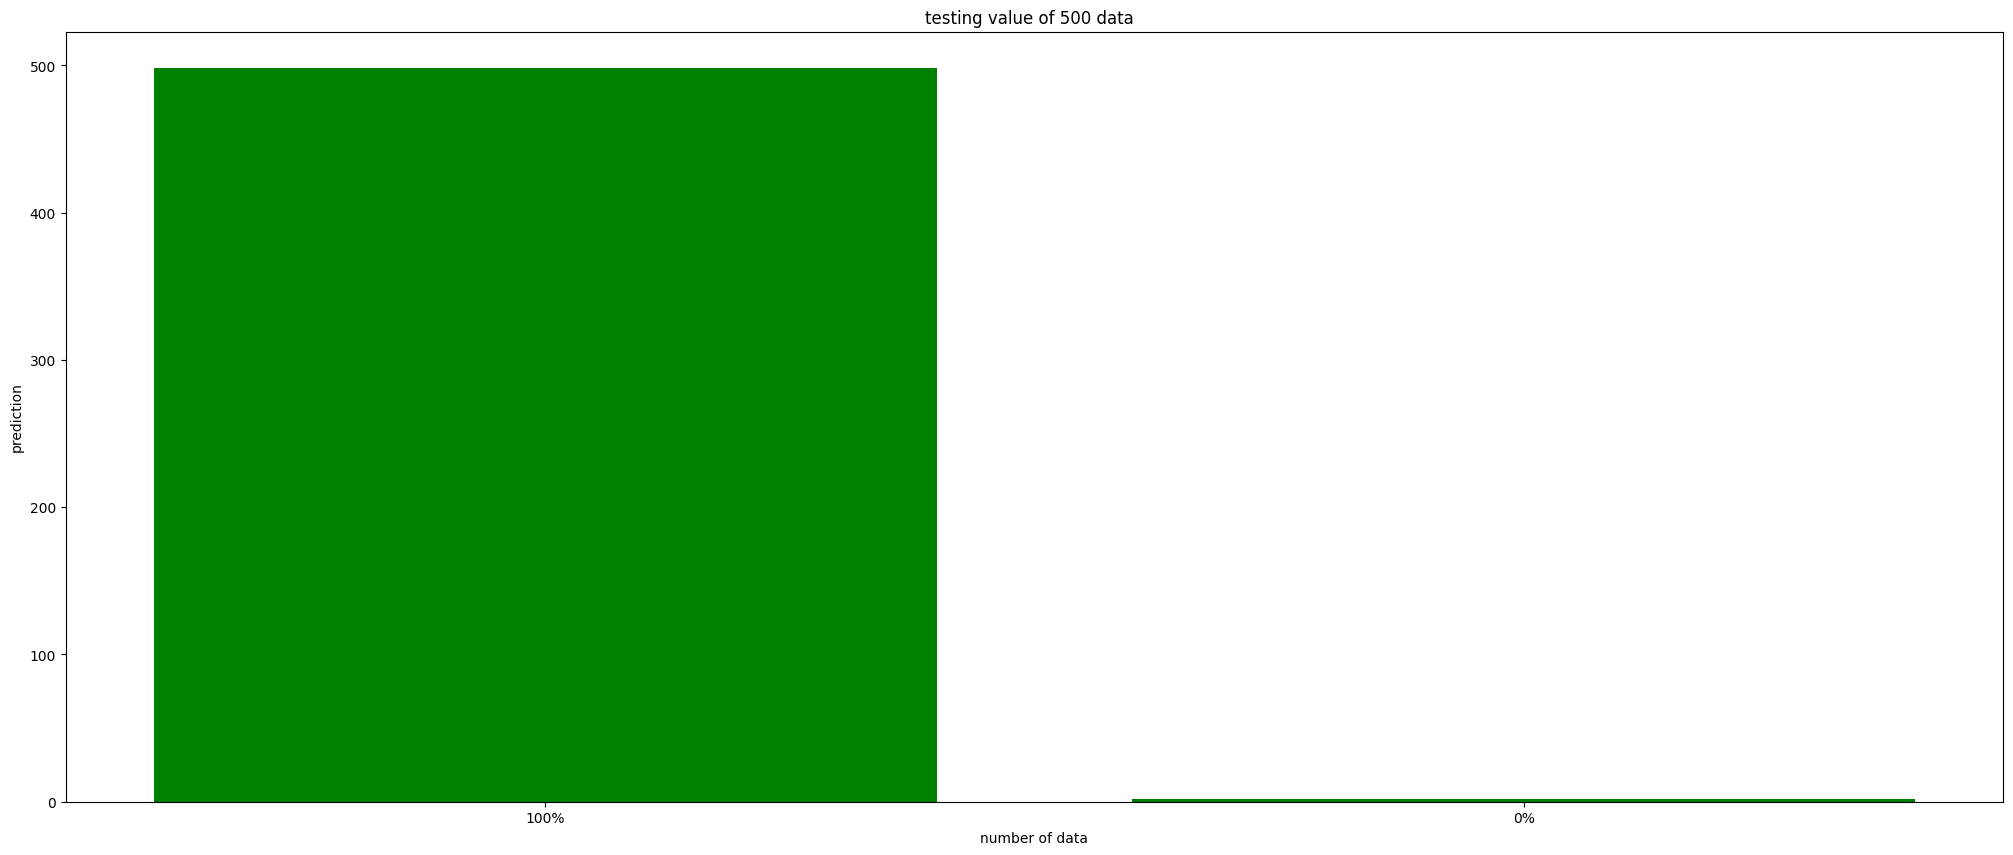

In [307]:

acc_predict=["100%","0%"]
acc_val=[500-accuracy,accuracy]
  

# print(df[20])
X = list(acc_predict)
Y = list(acc_val)
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(25)  
# Plot the data using bar() method
plt.bar(X[0:25], Y[0:25], color='g')
plt.title("testing value of 500 data  ")
plt.xlabel("number of data")
plt.ylabel("prediction")

# Show the plot
plt.show()
fig.savefig('trending_topic.png', dpi='figure', format=None)